<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2019 </h1>

<H3 align='center'> Tarea 0 - Introducción a Máquinas de Aprendizaje </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Introducción a librerías comunes de *Machine Learning*:
    * Pandas
    * Numpy
    * Sklearn
    * Matplotlib
    * Otro..
* Implementación de Perceptrón y variantes.
* Implementación de método aprendizaje online (Gradiente descendente).
 

** Formalidades **  
* Equipos de trabajo de: 2 personas
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de entrega: 6 de Septiembre.
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea0-INF393-II-2019]

<hr style="height:2px;border:none"/>

La tarea se divide en secciones:

[1.](#primero) Perceptrón a mano

<hr style="height:2px;border:none"/>


<a id="primero"></a>
## 1. Perceptrón a mano

<img src="https://miro.medium.com/max/1838/1*n6sJ4yZQzwKL9wnF5wnVNg.png" width="40%"  />

En esta sección se le pedirá que implemente el algoritmo online del *perceptrón* [[2]](#refs) para aprender una función de separación lineal en un problema de clasificación binaria (0 o 1) a través de la función de *treshold*. Un algoritmo online, como el caso del *perceptrón*, aprende de una instancia de dato a la vez $(x^{(i)},y^{(i)})$, dentro de un conjunto de datos $\{(x^{(1)},y^{(1)}), (x^{(2)},y^{(2)}), \ldots, (x^{(N)},y^{(N)})  \}$, donde la predicción de la clase para cada instancia es través de la función de *treshold*:

$$
\hat{y_i} = f(x^{(i)};w,b) = \left\{ \begin{array}{lc}
       1 &  si \ \sum_j w_j \cdot x^{(i)}_j +b \geq \theta \\
       0 &  si \ \sum_j w_j \cdot x^{(i)}_j +b < \theta
     \end{array} \right.
$$


Donde $\theta = 0$. Recordar que el *bias* $b$ se puede incluir dentro de los pesos/parámetros $w$ si se agrega una columna extra de 1's a los datos de entrada $x$ (*como se ve en la imagen anterior*). 

Para lo que sigue de la actividad sólo podrá utilizar *numpy* (para operaciones de algebra lineal).

> a) Escriba una función que calcule el valor de salida (*output*) del modelo $f(x)$ para un patrón de entrada $x$ a través de los pesos $w$ del modelo. *Decida si incluir los bias dentro de $w$ o manejarlos de manera separada*.

> b) Escriba una función que implemente el clásico algoritmo del **Perceptrón** para un problema binario que permita entrenarlo en un conjunto de datos de tamaño $N$, leídos de manera *online* (uno a uno). *Recordar la decisión anterior sobre los bias*.

> c) Demuestre que lo implementado funciona en un problema real de clasificación. Para esto utilice el dataset **Breast cancer wisconsin**, disponible a través de la librería __[*sklearn*](http://scikit-learn.org)__, el cual corresponde a la detección de cancer mamario a través de características relevantes (numéricas continuas) de un examen realizado, como por ejemplo la textura, simetría y tamaño de una masa mamaria. Estas características deben combinarse linealmente para la detección del cancer.
> <div class="alert alert-block alert-info">Es una buena práctica el normalizar los datos antes de trabajar con el modelo</div>
```python
from sklearn.datasets import load_breast_cancer
X_train,y_train = load_breast_cancer(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_train = np.c_[X_train, np.ones(N) ] #add columns of 1's if you want
```
Para evaluar los resultados mida la exactitud (*accuracy*) de la clasificación durante el entrenamiento (por cada iteración/instancia/dato) y grafique, utilice el conjunto de entrenamiento realizando una sola pasada (el objetivo de esta sección es familiarizarse con el algoritmo). Además reporte el tiempo de entrenamiento mediante el algoritmo implementado.

> d) Escriba una función que implemente el **Forgetrón** [[3]](#refs) con una memoria de tamaño $K$ y la función de kernel como el producto interno (*inner-product*), esto es $<a,b> = \sum_i a_i \cdot b_i$.

> e) Vuelva a realizar el item c) para el **Forgetrón** con un $K=10$ y compare los resultados.


### ¿Qué sucede al variar la función objetivo del problema? 
Si utilizáramos la función de pérdida *binary cross entropy*, que castiga de manera suave los valores en que se equivoca el modelo a través de que el valor de salida sea una confiabilidad $g(x; w,b) \in [0,1]$.
$$
\ell (y, \ g(x;w,b)) = - y \cdot \log{(g(x;w,b))} - (1-y) \cdot \log{(1-g(x;w,b))}
$$

Realice una modificación al perceptrón para que entregue como salida una confiabilidad continua entre 0 y 1. Una buena aproximación de la función *treshold* (con $\theta=0$) del perceptrón es la función sigmoidal.

<img src="https://i.imgur.com/lr6F3Ur.png" width="60%"  />

Ésto sería modelar el perceptrón como:
$$
g(x^{(i)};w,b) = p(y=1|x^{(i)}) = \sigma \left( \sum_j w_j \cdot x^{(i)}_j +b \right)
$$

Con $\sigma$ la función sigmoidal de la forma $\sigma(\xi) = 1/(1+e^{-\xi}) $, la cual tiene una derivada cíclica que hace más fácil el cálculo: $\sigma'(\xi) = \sigma(\xi) (1-\sigma(\xi))$

> f) Escriba una función que compute la función sigmoidal para una entrada $\xi$ cualquiera. *Tenga cuidado con los límites de números que puede trabajar python (por ejemplo $\exp{800}\rightarrow +\infty$)*. *Se aconseja acotar/truncar los valores que entran a la función para que la operación se pueda realizar*. Además escriba una función que calcule la salida del nuevo modelo $g(x; w,b)$ con esta función sigmoidal.

> g) Escriba una función que calcule la función de pérdida descrita anteriormente para un dato $x^{(i)}$, utilizando $g(x^{(i)};w,b)$. *Tenga cuidado con los límites del logaritmo (recordad que $\log{0}\rightarrow +\infty$)*.

> h) Escriba una función que calcule el gradiente (derivada) de la función de pérdida anterior con respecto a los pesos del modelo $w$. *Se recomienda derivarla analíticamente y luego escribirla*. *Recuerde el uso de la regla de la cadena*.

> i) Realice una modificación al algoritmo implementado en b) (**Perceptrón**) para que se adapte a la función objetivo *binary cross entropy* implementada, para ésto haga uso del algoritmo de optimización SGD [[4]](#refs) (*Stochastic Gradient Descend*) con tasa de aprendizaje $\eta \in [0,1]$.

$$ \vec{w}^{(t+1)} \leftarrow \vec{w}^{(t)} - \eta \cdot \nabla_{\vec{w}^{(t)}} \ell $$

> j) Vuelva a realizar el item c) con esta modificación, además grafique la función de pérdida en el transcurso del entrenamiento. Compare los resultados.

<a id="refs"></a>
### Referencias
[1] Hastie, T.; Tibshirani, R., Friedman, J. (2009), *The Elements of Statistical Learning*, Second Edition.
Springer New York Inc.  
[2] STEPHEN, I. (1990). *Perceptron-based learning algorithms*. IEEE Transactions on neural networks, 50(2), 179.  
[3] Dekel, O., Shalev-Shwartz, S., & Singer, Y. (2006). *The Forgetron: A kernel-based perceptron on a fixed budget*. In Advances in neural information processing systems (pp. 259-266).  
[4] Ruder, S. (2016). *An overview of gradient descent optimization algorithms*. arXiv preprint arXiv:1609.04747.  

# Desarrollo

In [0]:
#se cargan las tipicas librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import timeit
from sklearn.metrics import accuracy_score

> a) Escriba una función que calcule el valor de salida (*output*) del modelo $f(x)$ para un patrón de entrada $x$ a través de los pesos $w$ del modelo. *Decida si incluir los bias dentro de $w$ o manejarlos de manera separada*.
---



In [0]:
# se asume que x es un arreglo representando al i-ésimo dato que incluye un 1 al principio, w son los pesos del j-ésimo elemento de x.
# se asume que b, el bias, es el primer elemento de w
def treshold(x,w):
    return w.dot(x)
  
#theta = 0 por enunciado
def f(x,w,theta=0):
    if treshold(x,w) >= theta:
        return 1
    else:
        return 0

> b) Escriba una función que implemente el clásico algoritmo del **Perceptrón** para un problema binario que permita entrenarlo en un conjunto de datos de tamaño $N$, leídos de manera *online* (uno a uno). *Recordar la decisión anterior sobre los bias*.

La función perceptron recibe la matriz $X$ donde el primer elemento de una fila es el bias, el vector $y$, el valor $d$ que es la cantidad de variables de un ejemplo, $N$ que es la cantidad de ejemplos. Además la función recibe un factor $eta$, el cual definirá el factor que multiplica $y_i$ y  $x_i$ en el algoritmo del perceptrón. Por último, se define $k$ como el número de iteraciones máximo (por defecto son **100**).

La función devuelve una tupla que contiene el nuevo vector de los pesos w, el tiempo de ejecución y 2 listas que contienen todos los accuracy (una por cada iteración del while y otra por cada iteración del for)

In [0]:
def perceptron(x,y_true,d,N,etha,k=100):
    #comienza el cronometro
    start_time = timeit.default_timer()
    #inicializa las variables w, mistakes y accuracy
    w = np.zeros(d)
    mistakes = True
    accuracy_while = []
    accuracy_for = []
    #inicializa y_predecido
    y_pred = np.zeros(N,dtype = int)
    accuracy_while.append(accuracy_score(y_true,y_pred))
    while (mistakes and k!=0):
        mistakes = False
        for i in range(N):
            if (len(accuracy_for) <= 4*N): #se toman los accuracy de las primeras 4*N iteraciones del for
                accuracy_for.append(accuracy_score(y_true,y_pred))
            y_pred[i] = f(x[i],w)
            if (y_pred[i]*2-1)*(y_true[i]*2-1) < 0:
                w = w + etha * (y_true[i]*2-1) * x[i]
                mistakes = True
        #guardar el accuracy de cada iteracion
        accuracy_while.append(accuracy_score(y_true,y_pred))
        k-=1
    #termina el cronometro
    final_time = timeit.default_timer()
    time = final_time - start_time
    return (w,time,accuracy_while,accuracy_for)

> c) Demuestre que lo implementado funciona en un problema real de clasificación. Para esto utilice el dataset **Breast cancer wisconsin**, disponible a través de la librería __[*sklearn*](http://scikit-learn.org)__, el cual corresponde a la detección de cancer mamario a través de características relevantes (numéricas continuas) de un examen realizado, como por ejemplo la textura, simetría y tamaño de una masa mamaria. Estas características deben combinarse linealmente para la detección del cancer.
> <div class="alert alert-block alert-info">Es una buena práctica el normalizar los datos antes de trabajar con el modelo</div>


```
from sklearn.datasets import load_breast_cancer
X_train,y_train = load_breast_cancer(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_train = np.c_[X_train, np.ones(N) ] #add columns of 1's if you want

```


>Para evaluar los resultados mida la exactitud (*accuracy*) de la clasificación durante el entrenamiento (por cada iteración/instancia/dato) y grafique, utilice el conjunto de entrenamiento realizando una sola pasada (el objetivo de esta sección es familiarizarse con el algoritmo). Además reporte el tiempo de entrenamiento mediante el algoritmo implementado.

Se importan los datos de la librería sklearn y se crea con ellos una matriz $X$ con los datos de entrenamiento, mediante el código ayuda proporcionado.
Se muestra la matriz $X$ (parcial) conseguida. Se incluye un vector de 1's al principio de dicha matriz para más tarde considerar el bias en cada ejemplo i-ésimo, correspondientemente.

In [0]:
from sklearn.datasets import load_breast_cancer
X_train,y_train = load_breast_cancer(return_X_y=True)
scaler = sklearn.preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
N = X_train.shape[0]
d = X_train.shape[1] +1 
X_train = np.c_[np.ones(N),X_train]

Primero se grafica el desempeño por cada iteración del "while" en el algoritmo con un etha fijo:



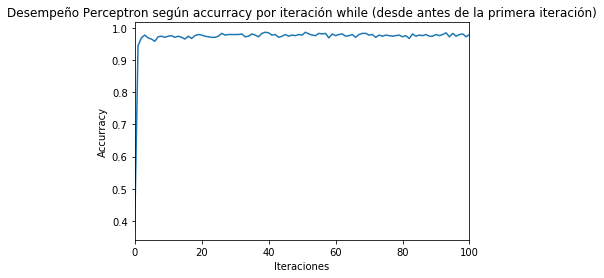

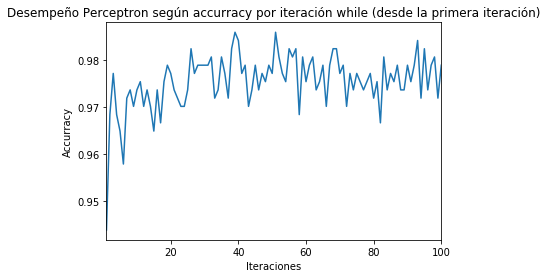

[0.37258347978910367, 0.9437609841827768]
Tiempo de ejecución: 0.44117532899997514 segundos


In [0]:
k = 100
etha = 0.5
w,tiempo,accuracy_while,accuracy_for = perceptron(X_train,y_train,d,N,etha,k)

plt.title("Desempeño Perceptron según accurracy por iteración while (desde antes de la primera iteración)")
plt.xlabel("Iteraciones")
plt.ylabel("Accurracy")

plt.plot(range(len(accuracy_while)),accuracy_while)
plt.xlim(0,k)
plt.show()

plt.clf()

plt.title("Desempeño Perceptron según accurracy por iteración while (desde la primera iteración)")
plt.xlabel("Iteraciones")
plt.ylabel("Accurracy")

plt.plot(range(1,len(accuracy_while)),accuracy_while[1:])
plt.xlim(1,k)
plt.show()

print (accuracy_while[:2])
print ("Tiempo de ejecución:", tiempo, "segundos")

Como se puede observar, ya desde la primera iteración el accurracy aumenta significativamente del 37,2% al 94,4%. Luego tiene un comportamiento severamente errático, con varios peak y valles. Pero se puede observar que en promedio, el accurracy aumenta hasta la iteración 30 y luego se mantiene entre 97% y 98% aproximadamente hasta las 100 iteraciones.

El accurracy nunca llega al 100%, lo que puede deberse a 3 cosas:

1. El valor etha no es el adecuado
2. Faltaron cantidad de iteraciones
3. No hay una separación lineal de los datos

o tambien puede ser que la función objetivo no sea la adecuada para este problema.


A continuación se analizará que ocurre cuando se modifica etha a 0.001, 0.9 y 1000:

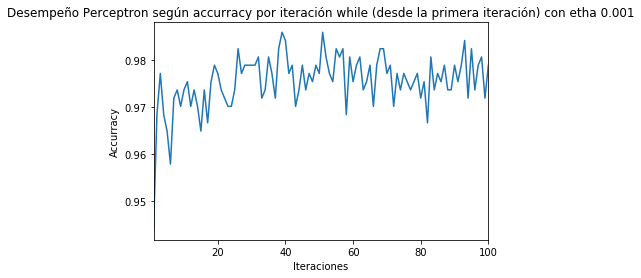

Tiempo de ejecución: 0.4438962399999582 segundos


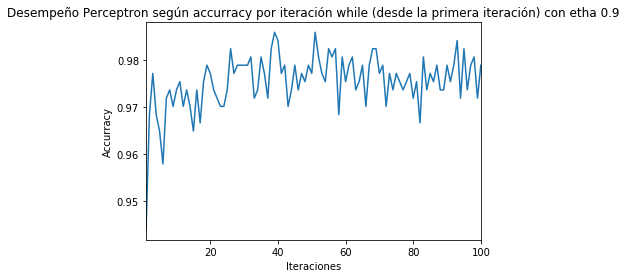

Tiempo de ejecución: 0.45282389000021794 segundos


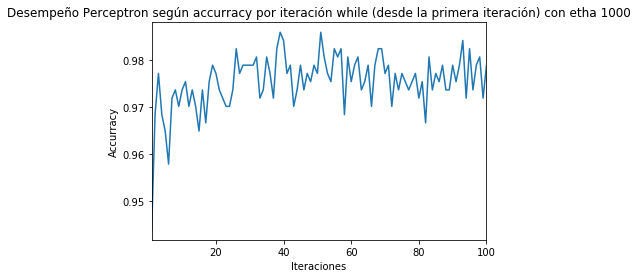

Tiempo de ejecución: 0.4494096379999064 segundos


In [0]:
k = 100
etha = 0.001
w,tiempo,accuracy_while,accuracy_for = perceptron(X_train,y_train,d,N,etha,k)

plt.title("Desempeño Perceptron según accurracy por iteración while (desde la primera iteración) con etha 0.001")
plt.xlabel("Iteraciones")
plt.ylabel("Accurracy")

plt.plot(range(1,len(accuracy_while)),accuracy_while[1:])
plt.xlim(1,k)
plt.show()

print ("Tiempo de ejecución:", tiempo, "segundos")

plt.clf()

k = 100
etha = 0.9
w,tiempo,accuracy_while,accuracy_for = perceptron(X_train,y_train,d,N,etha,k)

plt.title("Desempeño Perceptron según accurracy por iteración while (desde la primera iteración) con etha 0.9")
plt.xlabel("Iteraciones")
plt.ylabel("Accurracy")

plt.plot(range(1,len(accuracy_while)),accuracy_while[1:])
plt.xlim(1,k)
plt.show()

print ("Tiempo de ejecución:", tiempo, "segundos")

plt.clf()

k = 100
etha = 1000
w,tiempo,accuracy_while,accuracy_for = perceptron(X_train,y_train,d,N,etha,k)

plt.title("Desempeño Perceptron según accurracy por iteración while (desde la primera iteración) con etha 1000")
plt.xlabel("Iteraciones")
plt.ylabel("Accurracy")

plt.plot(range(1,len(accuracy_while)),accuracy_while[1:])
plt.xlim(1,k)
plt.show()

print ("Tiempo de ejecución:", tiempo, "segundos")

Como se puede observar, no hay modificaciones al cambiar etha, esto puede producirse ya que la función treshold es binaria, por lo que es irrelevante cuánto aumenta cada peso de w si es que finalmente lo que importa es si da negativo o positivo el producto punto con el vector x.

Ahora se analizará lo que ocurre cuando se aumenta el valor k (iteraciones) a 10000:

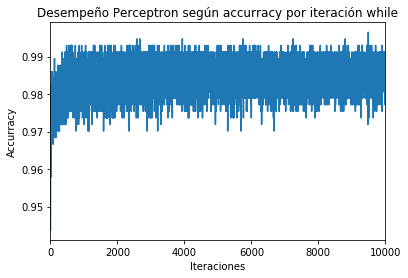

Tiempo de ejecución: 16.27326156999993 segundos


In [0]:
k = 10000
etha = 0.5
w,tiempo,accuracy_while,accuracy_for = perceptron(X_train,y_train,d,N,etha,k)

plt.title("Desempeño Perceptron según accurracy por iteración while")
plt.xlabel("Iteraciones")
plt.ylabel("Accurracy")

plt.plot(range(1,len(accuracy_while)),accuracy_while[1:])
plt.xlim(0,k)
plt.show()

print ("Tiempo de ejecución:", tiempo, "segundos")

El resultado anterior significa que con 1000 iteraciones, el algoritmo no llega a la solución con un 100% de accurracy.

Por lo que se concluye que el problema no es separable linealmente o que la función objetivo treshold no es la adecuada.

A continuación se analizará lo que ocurre dentro de cada iteración for (es decir, cada dato que se entrega al algoritmo perceptron):



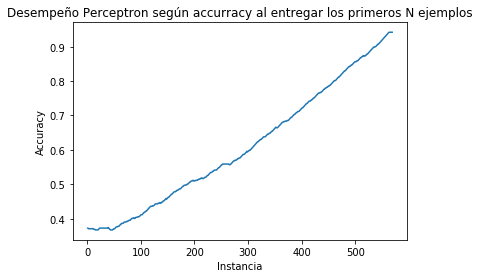

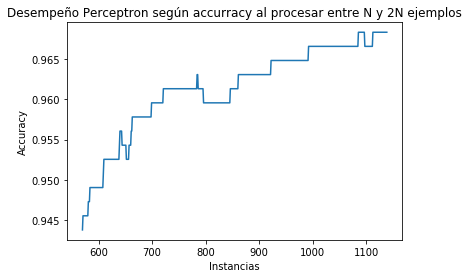

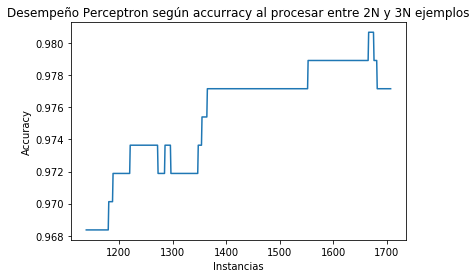

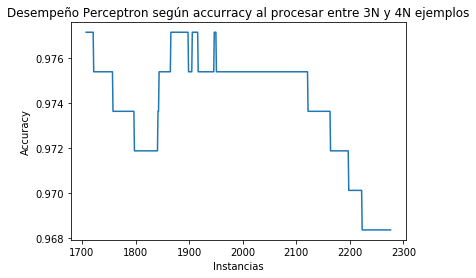

In [0]:
plt.title("Desempeño Perceptron según accurracy al entregar los primeros N ejemplos")
plt.ylabel("Accuracy")
plt.xlabel("Instancia")

plt.plot(range(1,N+1),accuracy_for[0:N])
#plt.legend(loc="best")
plt.show()

plt.clf()

plt.title("Desempeño Perceptron según accurracy al procesar entre N y 2N ejemplos")
plt.ylabel("Accuracy")
plt.xlabel("Instancias")

plt.plot(range(N+1,2*N+1),accuracy_for[N:2*N])
#plt.legend(loc="best")
plt.show()

plt.clf()

plt.title("Desempeño Perceptron según accurracy al procesar entre 2N y 3N ejemplos")
plt.ylabel("Accuracy")
plt.xlabel("Instancias")

plt.plot(range(2*N+1,3*N+1),accuracy_for[2*N:3*N])
#plt.legend(loc="best")
plt.show()

plt.clf()

plt.title("Desempeño Perceptron según accurracy al procesar entre 3N y 4N ejemplos")
plt.ylabel("Accuracy")
plt.xlabel("Instancias")

plt.plot(range(3*N+1,4*N+1),accuracy_for[3*N:4*N])
#plt.legend(loc="best")
plt.show()

Como se puede observar, por cada instancia de la primera iteración, aumentaba el desempeño de forma creciente. 

Pero en la segunda iteración, ya no es enteramente creciente el desempeño si no que se puede apreciar que baja en algunos casos, pero en general sigue creciento. 

En la tercera iteración ya son más notorios los aumentos y decrecimiento del desempeño, además de que hay varias instancias en que no se modifica w, es decir que la predicción del algoritmo fue acertada. 

Por último en la cuarta iteración se puede apreciar que generalmente va decreciendo, por lo que ya pasó por su máximo local en la iteración anterior.

> d) Escriba una función que implemente el **Forgetrón** [[3]](#refs) con una memoria de tamaño $K$ y la función de kernel como el producto interno (*inner-product*), esto es $<a,b> = \sum_i a_i \cdot b_i$.


A partir del paper de Dekel, Shalev-Shwartz y Singer (2005) se procedió a implementar el Forgetrón y las funciones auxiliares que son necesarias para su funcionamiento:

In [0]:
# Devuelve el signo (positivo o negativo, como 1 o -1) del valor que se le pasa por parametro
def sign(f):
  
  if(f >= 0):
    
    return 1

  else:
    
    return -1
  
# Devuelve el escalar f' que se define en el paper de Dekel a partir del dato observado, el set activo, la matriz de pesos y los datos de entrenamiento
def f_prima(X,Y,t,I,x,sigma):
  
  suma = 0
  
  for i in I:
      
      suma += sigma[i][t] * (Y[i] * 2 - 1) * X[i].dot(x)
  
  return suma + (Y[i] * 2 - 1) * X[t].dot(x)
  
# Devuelve el valor de mu (letra griega) que se define en el paper de Dekel en base a f' y el y respectivo al minimo del set activo
def mu(y_rt,f_prima):
  
  return y_rt * f_prima

# Devuelve el escalar PSI (letra capital griega) definido en el paper de Dekel en base a los pesos, un valor phi (letra griega) y mu
def PSI(sigma,phi,mu):
  
  return (sigma * phi)**2 + 2 * sigma * phi * (1 - phi * mu)

# Devuelve el valor del PSI respectivo al t-esimo ejemplo observado, definido en el paper de Dekel en base a los pesos, 
def PSI_t(sigma,phi,mu,t,J,I_t,B):
  
  if((t in J) and  (len(I_t) == B)):
  
    return (sigma * phi)**2 + 2 * sigma * phi * (1 - phi * mu)
  
  else:
    
    return 0

# Se define como special_set al conjunto del que se extrae phi (en la linea que comienza con "choose phi_t..." del algoritmo) tal que cumple las restricciones
def special_set(sigma,mu,Q,M):

  vect = np.arange(0.001, 1.001, 0.001, float)

  cjto = set([])
  for phi in vect:
    if((PSI(sigma,phi,mu) + Q) <= (15.0/32) * M):
      cjto.add(phi)
  
  return cjto

# K(x_i,x_t_T) = <x_i,x_t_T> ; con x_i un ejemplo observado y x_t_T
def forgetron(X,Y,K):
  
  #comienza el cronometro
  start_time = timeit.default_timer()
  
  mem = K
  # inicializacion
  I = [set([])]
  J = set([])
  f = [0]
  Q = [0]
  M = [0]
  
  predict_label = []
  acc = []
  I_prima = []
  sigma = np.zeros((X.shape[0] + 1, X.shape[0] + 1))
  
  t_last = X.shape[0]
  
  # tener en cuenta que t quedara desplazado, es decir, comenzara en t = 0 y no 1 
  for t in range(t_last):
    x_t = X[t]
    predict_label.append(sign(f[t])) # f[t] contiene f(x[t]); para evitar recalcular
    y_t = Y[t] # correct label y_t
    
    acc.append(accuracy_score(Y[0:len(predict_label)],predict_label))
    
    if((y_t * 2 - 1) * f[t] > 0):
      
      I.append(I[t])
      Q.append(Q[t])
      M.append(M[t])
      
      for i in I[t]:
        sigma[i][t + 1] = sigma[i,t]
        
    else:
      
      M.append(M[t] + 1)
      I_prima.append(I[t].union({t}))
      J.add(t)
      
      if(len(I_prima[-1]) <= mem):
        
        I.append(I_prima[-1])
        Q.append(Q[t])
        sigma[t][t] = 1
        
        for i in I[t + 1]:
          
          sigma[i][t + 1] = sigma[i][t]
          
      else:
        
        r_t = min(I[t])
        phi = max(special_set(sigma[r_t][t], mu((Y[r_t] * 2 - 1), f_prima(X,Y,t,I[t], X[r_t],sigma)), Q[t], M[t + 1]))
        sigma[t][t] = 1
        
        for i in I_prima[-1]:
        
          sigma[i][t + 1] = phi * sigma[i][t]
      
        Q.append(Q[t] + PSI_t(sigma[r_t][t], phi, mu((Y[r_t] * 2 - 1), f_prima(X, Y, t, I[t], X[r_t], sigma)), t, J, I[t], mem))
        I_prima[-1].remove(r_t)
        I.append(I_prima[-1])
        
    suma = 0
    for i in I[t + 1]:

      suma += sigma[i][t + 1] * (Y[i] * 2 - 1) * X[i].dot(X[t])
      
    f.append(suma)
    
  #termina el cronometro
  final_time = timeit.default_timer()
  time = final_time - start_time  
  
  return predict_label, acc, time

> e) Vuelva a realizar el item c) para el **Forgetrón** con un $K=10$ y compare los resultados.

Se procede a obtener los datos de entrenamiento nuevamente:

In [0]:
from sklearn.datasets import load_breast_cancer
X_train,y_train = load_breast_cancer(return_X_y=True)
scaler = sklearn.preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
N = X_train.shape[0]
d = X_train.shape[1] + 1 
X_train = np.c_[np.ones(N),X_train]

print(N)

569


Con los datos de entrenamiento se llama a la función del Forgetrón, y se procede a realizar la gráfica del accuracy de los n ejemplos que son observados en el Forgetrón, vale decir, comenzando en 1 ejemplo obvervado, luego 2 y así sucesivamente hasta alcanzar el total de ejemplos de los datos de entrenamiento. Además, se muestra el tiempo de ejecución:

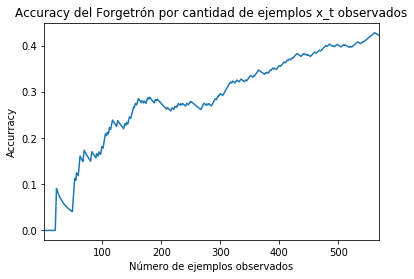

Tiempo de ejecución: 0.47 segundos


In [0]:
predict, acc, tiempo = forgetron(X_train,y_train,10)

plt.title("Accuracy del Forgetrón por cantidad de ejemplos x_t observados")
plt.xlabel("Número de ejemplos observados")
plt.ylabel("Accurracy")

plt.plot(range(1,N+1),acc)
plt.xlim(1,N)
#plt.legend(loc="best")
plt.show()

print ("Tiempo de ejecución:", round(tiempo,2), "segundos")

  Se tiene que en el caso del Forgetrón la construcción del resultado es incremental, pudiendo conocer la n-ésima etiqueta solo en la n-ésima iteración del algoritmo. Por ello, solo es posible construir la gráfica del accuracy en la i-ésima iteración, es decir, cuando se tienen i etiquetas predecidas por el Forgetrón.
  
  En el gráfico se puede apreciar que el accuracy mejora conforme se tienen más etiquetas predecidas que comparar con las etiquetas reales.
  
  En comparación con el Perceptrón, cuyos resultados se muestran en el inciso c), se puede apreciar que el accuracy del Forgetrón es peor pues solo alcanza el 42% aproximadamente, cuando obtiene el total de etiquetas.
  Con respecto al tiempo de ejecución, se obtienen tiempos similares para el Perceptrón y el Forgetrón.

El resultado anterior motiva a pensar que el accuracy logrado depende del número de ejemplos que tenga el conjunto de entrenamiento, lo cual se revisará:

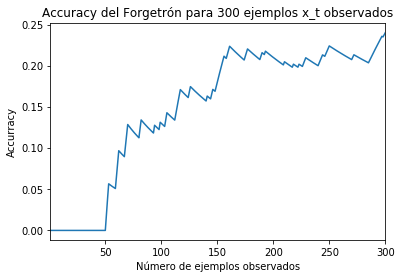

Tiempo de ejecución: 0.22 segundos


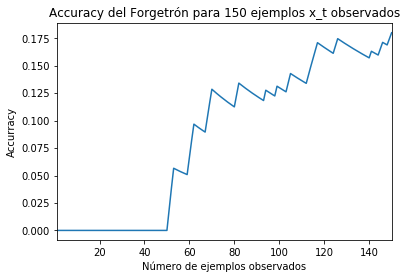

Tiempo de ejecución: 0.11 segundos


In [0]:
from sklearn.datasets import load_breast_cancer
X_train,y_train = load_breast_cancer(return_X_y=True)
X_train_300 = X_train[0:300]
y_train_300 = y_train[0:300]
scaler = sklearn.preprocessing.StandardScaler().fit(X_train_300)
X_train = scaler.transform(X_train_300)
N = X_train_300.shape[0]
d = X_train_300.shape[1] + 1 
X_train_300 = np.c_[np.ones(N),X_train_300]

predict, acc, tiempo = forgetron(X_train_300,y_train_300,15)

plt.title("Accuracy del Forgetrón para 300 ejemplos x_t observados")
plt.xlabel("Número de ejemplos observados")
plt.ylabel("Accurracy")

plt.plot(range(1,N+1),acc)
plt.xlim(1,N)
#plt.legend(loc="best")
plt.show()

print ("Tiempo de ejecución:", round(tiempo,2), "segundos")

from sklearn.datasets import load_breast_cancer
X_train,y_train = load_breast_cancer(return_X_y=True)
X_train_150 = X_train[0:150]
y_train_150 = y_train[0:150]
scaler = sklearn.preprocessing.StandardScaler().fit(X_train_150)
X_train = scaler.transform(X_train_150)
N = X_train_150.shape[0]
d = X_train_150.shape[1] + 1 
X_train_150 = np.c_[np.ones(N),X_train_150]

predict, acc, tiempo = forgetron(X_train_150,y_train_150,15)

plt.title("Accuracy del Forgetrón para 150 ejemplos x_t observados")
plt.xlabel("Número de ejemplos observados")
plt.ylabel("Accurracy")

plt.plot(range(1,N+1),acc)
plt.xlim(1,N)
#plt.legend(loc="best")
plt.show()

print ("Tiempo de ejecución:", round(tiempo,2), "segundos")

A partir de lo anterior se aprecia que en el Forgetron se expresa una diferencia en el accuracy dependendiendo de la cantidad de datos de entrenamiento que se posean. Vale destacar que la dependencia no es trivial, pues por simple inspección se desprende de los gráficos que en el caso del total de ejemplos observados, igual a 569, cuando el Forgetrón lleva 150 o 300 ejemplos observados tiene mayor accuracy que en los casos en que dichos valores son el total de ejemplos de la muestra (últimas dos gráficas).

También se puede comparar cómo influye el tamaño de la memoria en el accuracy:

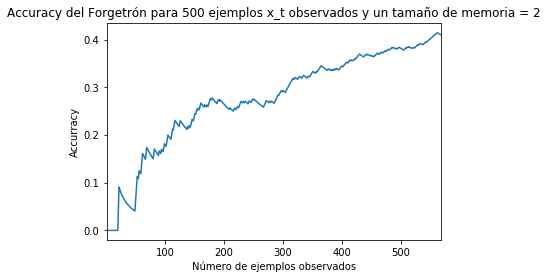

Tiempo de ejecución: 0.45 segundos


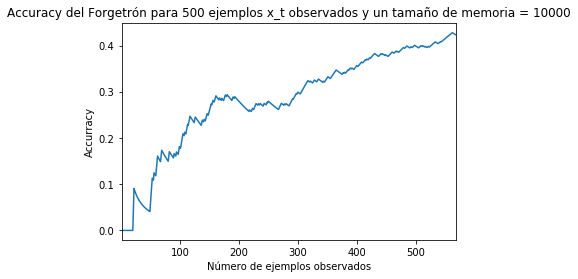

Tiempo de ejecución: 0.31 segundos


In [0]:
from sklearn.datasets import load_breast_cancer
X_train,y_train = load_breast_cancer(return_X_y=True)
scaler = sklearn.preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
N = X_train.shape[0]
d = X_train.shape[1] + 1 
X_train = np.c_[np.ones(N),X_train]

predict, acc, tiempo = forgetron(X_train,y_train,2)

plt.title("Accuracy del Forgetrón para 500 ejemplos x_t observados y un tamaño de memoria = 2")
plt.xlabel("Número de ejemplos observados")
plt.ylabel("Accurracy")

plt.plot(range(1,N+1),acc)
plt.xlim(1,N)
#plt.legend(loc="best")
plt.show()

print ("Tiempo de ejecución:", round(tiempo,2), "segundos")

predict, acc, tiempo = forgetron(X_train,y_train,10000)

plt.title("Accuracy del Forgetrón para 500 ejemplos x_t observados y un tamaño de memoria = 10000")
plt.xlabel("Número de ejemplos observados")
plt.ylabel("Accurracy")

plt.plot(range(1,N+1),acc)
plt.xlim(1,N)
#plt.legend(loc="best")
plt.show()

print ("Tiempo de ejecución:", round(tiempo,2), "segundos")

De los gráficos anteriores se aprecia con dificultad la diferencia entre el tamaño de la memoria para 569 datos de entrenamiento.

Veamos para 150 datos:

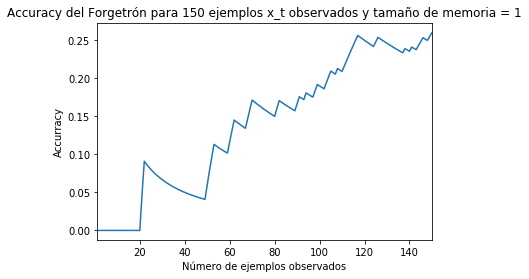

Tiempo de ejecución: 0.1 segundos




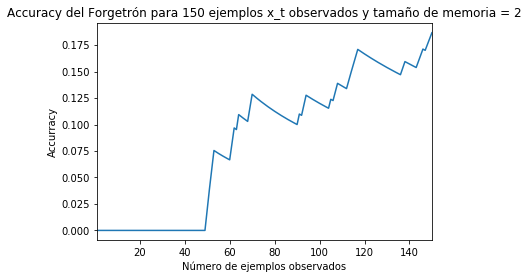

Tiempo de ejecución: 0.14 segundos




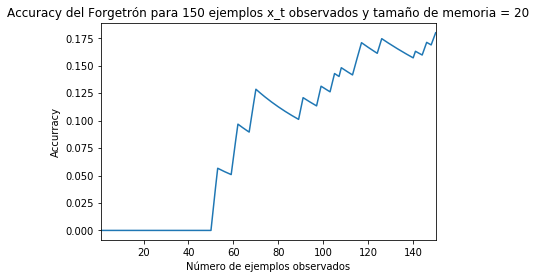

Tiempo de ejecución: 0.11 segundos




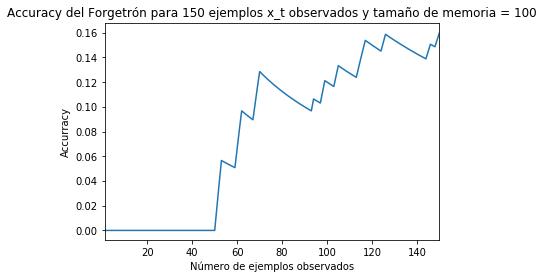

Tiempo de ejecución: 0.05 segundos




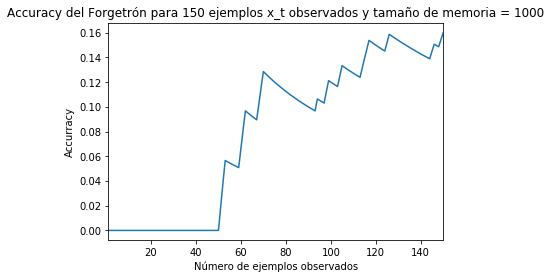

Tiempo de ejecución: 0.05 segundos




In [0]:
from sklearn.datasets import load_breast_cancer
X_train,y_train = load_breast_cancer(return_X_y=True)
X_train_150 = X_train[0:150]
y_train_150 = y_train[0:150]
scaler = sklearn.preprocessing.StandardScaler().fit(X_train_150)
X_train = scaler.transform(X_train_150)
N = X_train_150.shape[0]
d = X_train_150.shape[1] + 1 
X_train_150 = np.c_[np.ones(N),X_train_150]

predict, acc, tiempo = forgetron(X_train_150,y_train_150,1)

plt.title("Accuracy del Forgetrón para 150 ejemplos x_t observados y tamaño de memoria = 1")
plt.xlabel("Número de ejemplos observados")
plt.ylabel("Accurracy")

plt.plot(range(1,N+1),acc)
plt.xlim(1,N)
#plt.legend(loc="best")
plt.show()

print ("Tiempo de ejecución:", round(tiempo,2), "segundos")
print("\n")

predict, acc, tiempo = forgetron(X_train_150,y_train_150,3)

plt.title("Accuracy del Forgetrón para 150 ejemplos x_t observados y tamaño de memoria = 2")
plt.xlabel("Número de ejemplos observados")
plt.ylabel("Accurracy")

plt.plot(range(1,N+1),acc)
plt.xlim(1,N)
#plt.legend(loc="best")
plt.show()

print ("Tiempo de ejecución:", round(tiempo,2), "segundos")
print("\n")


predict, acc, tiempo = forgetron(X_train_150,y_train_150,20)

plt.title("Accuracy del Forgetrón para 150 ejemplos x_t observados y tamaño de memoria = 20")
plt.xlabel("Número de ejemplos observados")
plt.ylabel("Accurracy")

plt.plot(range(1,N+1),acc)
plt.xlim(1,N)
#plt.legend(loc="best")
plt.show()

print ("Tiempo de ejecución:", round(tiempo,2), "segundos")
print("\n")

predict, acc, tiempo = forgetron(X_train_150,y_train_150,100)

plt.title("Accuracy del Forgetrón para 150 ejemplos x_t observados y tamaño de memoria = 100")
plt.xlabel("Número de ejemplos observados")
plt.ylabel("Accurracy")

plt.plot(range(1,N+1),acc)
plt.xlim(1,N)
#plt.legend(loc="best")
plt.show()

print ("Tiempo de ejecución:", round(tiempo,2), "segundos")
print("\n")

predict, acc, tiempo = forgetron(X_train_150,y_train_150,1000)

plt.title("Accuracy del Forgetrón para 150 ejemplos x_t observados y tamaño de memoria = 1000")
plt.xlabel("Número de ejemplos observados")
plt.ylabel("Accurracy")

plt.plot(range(1,N+1),acc)
plt.xlim(1,N)
#plt.legend(loc="best")
plt.show()

print ("Tiempo de ejecución:", round(tiempo,2), "segundos")
print("\n")

Se aprecia que el tamaño de la memoria sí influye en el accuracy que se obtiene, sin embargo, no se muestra que más memoria signifique mejor accuracy, sino que hay un valor para el tamaño de la memoria a partir del cual se obtiene un accuracy límite mediante el algoritmo del Forgetrón. Por lo tanto, lo ideal sería aprovechar dicha relación para lograr el mejor accuracy sujeto a minimizar el tamaño de la memoria utilizada.

### ¿Qué sucede al variar la función objetivo del problema? 
Si utilizáramos la función de pérdida *binary cross entropy*, que castiga de manera suave los valores en que se equivoca el modelo a través de que el valor de salida sea una confiabilidad $g(x; w,b) \in [0,1]$.
$$
\ell (y, \ g(x;w,b)) = - y \cdot \log{(g(x;w,b))} - (1-y) \cdot \log{(1-g(x;w,b))}
$$

Realice una modificación al perceptrón para que entregue como salida una confiabilidad continua entre 0 y 1. Una buena aproximación de la función *treshold* (con $\theta=0$) del perceptrón es la función sigmoidal.

<img src="https://i.imgur.com/lr6F3Ur.png" width="60%"  />

Ésto sería modelar el perceptrón como:
$$
g(x^{(i)};w,b) = p(y=1|x^{(i)}) = \sigma \left( \sum_j w_j \cdot x^{(i)}_j +b \right)
$$

Con $\sigma$ la función sigmoidal de la forma $\sigma(\xi) = 1/(1+e^{-\xi}) $, la cual tiene una derivada cíclica que hace más fácil el cálculo: $\sigma'(\xi) = \sigma(\xi) (1-\sigma(\xi))$

> f) Escriba una función que compute la función sigmoidal para una entrada $\xi$ cualquiera. *Tenga cuidado con los límites de números que puede trabajar python (por ejemplo $\exp{800}\rightarrow +\infty$)*. *Se aconseja acotar/truncar los valores que entran a la función para que la operación se pueda realizar*. Además escriba una función que calcule la salida del nuevo modelo $g(x; w,b)$ con esta función sigmoidal.

In [0]:
def sigmoidal(xi):
    if xi>36:
        xi = 36
    if xi<-709:
        xi = -709
    return 1/(1+np.exp(-xi))

> g) Escriba una función que calcule la función de pérdida descrita anteriormente para un dato $x^{(i)}$, utilizando $g(x^{(i)};w,b)$. *Tenga cuidado con los límites del logaritmo (recordad que $\log{0}\rightarrow +\infty$)*.



In [0]:
def g(x_i,w):
    resultado = sigmoidal(x_i.dot(w))
    return resultado

def l(y,x_i,w):
    resultado = -float(y) * np.log(g(x_i,w)) - (1-float(y)) * np.log(1-g(x_i,w))
    return resultado

> h) Escriba una función que calcule el gradiente (derivada) de la función de pérdida anterior con respecto a los pesos del modelo $w$. *Se recomienda derivarla analíticamente y luego escribirla*. *Recuerde el uso de la regla de la cadena*.



In [0]:
def gradiente_l(y,x_i,w):
    return (-y + g(x_i,w)) * x_i

> i) Realice una modificación al algoritmo implementado en b) (**Perceptrón**) para que se adapte a la función objetivo *binary cross entropy* implementada, para ésto haga uso del algoritmo de optimización SGD [[4]](#refs) (*Stochastic Gradient Descend*) con tasa de aprendizaje $\eta \in [0,1]$.

$$ \vec{w}^{(t+1)} \leftarrow \vec{w}^{(t)} - \eta \cdot \nabla_{\vec{w}^{(t)}} \ell $$



In [0]:
def f(x,w,theta=0):
    #print(x,w)
    if w.dot(x) >= theta:
        return 1
    else:
        return 0

def get_accuracy(y,w,x):
    suma = 0
    for i in range(len(y)):
        if f(x[i],w)==y[i]:
            suma+=1
    return suma/len(y)
    
def perceptron_modificado(x,y_true,d,N,etha,k=100):
    #comienza el cronometro
    start_time = timeit.default_timer()
    #inicializa las variables w, mistakes y accuracy
    w = np.zeros(d)
    mistakes = True
    accuracy_while = []
    accuracy_instancia = []
    #accuracy_iteracion.append(get_accuracy(y_true,w,x))
    accuracy = 0.0
    while (mistakes and k!=0):
        mistakes = False
        for i in range(N):
            #BCE = l(y_true[i],x[i],w)
            accuracy = get_accuracy(y_true,w,x)
            #print (BCE)
            if (len(accuracy_for) <= 4*N):
                accuracy_for.append(get_accuracy(y_true,w,x))
            #print(BCE)
            if accuracy<1.0:
                w = w - etha * gradiente_l(y_true[i],x[i],w)
                mistakes = True
        #guardar error de la iteracion
        accuracy = get_accuracy(y_true,w,x)
        accuracy_while.append(accuracy)
        k-=1
    #termina el cronometro
    final_time = timeit.default_timer()
    time = final_time - start_time
    return (w,time,accuracy_while,accuracy_for)

> j) Vuelva a realizar el item c) con esta modificación, además grafique la función de pérdida en el transcurso del entrenamiento. Compare los resultados.

In [0]:
from sklearn.datasets import load_breast_cancer
X_train,y_train = load_breast_cancer(return_X_y=True)
scaler = sklearn.preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
N = X_train.shape[0]
d = X_train.shape[1] +1 
X_train = np.c_[np.ones(N),X_train]

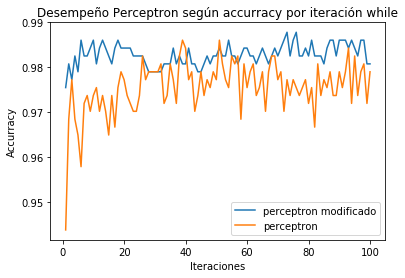

Tiempo de ejecución: 45.023272894999536 segundos


In [0]:
k = 100
etha = 0.5
w,tiempo,accuracy_while,accuracy_for = perceptron_modificado(X_train,y_train,d,N,etha,k)

w2,tiempo2,accuracy_while2,accuracy_for2 = perceptron(X_train,y_train,d,N,etha,k)

#print(w)
plt.title("Desempeño Perceptron según accurracy por iteración while")
plt.xlabel("Iteraciones")
plt.ylabel("Accurracy")

plt.plot(range(1,len(accuracy_while)+1),accuracy_while,label="perceptron modificado")
plt.plot(range(1,len(accuracy_while2)),accuracy_while2[1:],label="perceptron")
plt.legend(loc="best")
plt.show()

print ("Tiempo de ejecución:", tiempo, "segundos")

Como se observa, el perceptrón modificado tiene en general un mayor accuracy que el anterior y una menor varianza, pero se demora signficiativamente más. A pesar de todo, el perceptrón con la función objetivo binary cross entropy aún no llega al 100% de accurracy. A continuación se cambiará el etha:

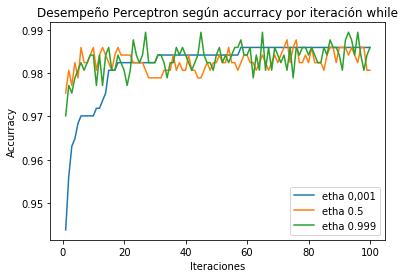

Tiempo de ejecución: 134.3136593579984 segundos


In [0]:
k = 100
etha = 0.001
w,tiempo1,accuracy_while1,accuracy_for = perceptron_modificado(X_train,y_train,d,N,etha,k)

etha = 0.5
w,tiempo2,accuracy_while2,accuracy_for = perceptron_modificado(X_train,y_train,d,N,etha,k)

etha = 0.999
w,tiempo3,accuracy_while3,accuracy_for = perceptron_modificado(X_train,y_train,d,N,etha,k)

#print(w)
plt.title("Desempeño Perceptron según accurracy por iteración while")
plt.xlabel("Iteraciones")
plt.ylabel("Accurracy")

plt.plot(range(1,len(accuracy_while1)+1),accuracy_while1, label="etha 0,001")
plt.plot(range(1,len(accuracy_while2)+1),accuracy_while2, label="etha 0.5")
plt.plot(range(1,len(accuracy_while3)+1),accuracy_while3, label="etha 0.999")
plt.legend(loc="best")
plt.show()

print ("Tiempo de ejecución:", tiempo1 + tiempo2 + tiempo3, "segundos")

Los resultados anteriores nos muestran que modificar el valor de etha tiene un impacto en los resultados, esto se da porque la función objetivo ahora es continua. Sobre la variación de etha, se puede apreciar que al tener un etha cercano a cero, tiene menos peaks abruptos que al aumentar etha, es por esto que al aumentar etha llega más lento a un accurrecy mayor (comparado con los otros valores de etha).